# Importing Required Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV

%matplotlib inline
plt.style.use('ggplot')

# Getting the Data

In [0]:
orig_data = pd.read_excel("data.xlsx")

In [0]:
#keeping a copy
data = orig_data.copy()

# Data Stats

In [760]:
print("Shape of the Data: {}".format(data.shape))

Shape of the Data: (1000, 18)


In [761]:
data.columns

Index(['Application id', 'first_name', 'last_name', 'email', 'gender',
       'address', 'age', 'tdecision', 'empstaus', 'ExCus (Customer in Past)',
       'Source', 'Salary', 'ExDebt (Liability)', 'Booking', 'INT_ID',
       'Prev_ID', 'AGT_ID', 'Booking_Amt'],
      dtype='object')

In [762]:
data.head()

,Application id,first_name,last_name,email,gender,address,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking,INT_ID,Prev_ID,AGT_ID,Booking_Amt
0,1,Dollie,Scafe,dscafe0@is.gd,Female,02 Garrison Pass,34,Pending,SE,Y,EC,127110,25130,NaN,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,NaN
1,2,Austin,Pennycook,apennycook1@mac.com,Male,007 Miller Road,57,Approve,SE,Y,D,464039,22311,Y,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,278423.4
2,3,Mareah,Tomanek,mtomanek2@bloomberg.com,Female,145 Charing Cross Junction,57,Approve,SE,Y,3P,584420,28557,Y,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,350652.0
3,4,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,Female,268 Algoma Hill,59,Approve,SE,Y,3P,583781,26042,Y,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,350268.6
4,5,Danyette,Stempe,dstempe4@tumblr.com,Female,571 Stone Corner Park,51,Approve,SE,N,MP,551718,27892,Y,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,331030.8


In [0]:
#data.columns

In [0]:
data_cols=data.columns

In [765]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Application id            1000 non-null   int64  
 1   first_name                1000 non-null   object 
 2   last_name                 1000 non-null   object 
 3   email                     1000 non-null   object 
 4   gender                    1000 non-null   object 
 5   address                   1000 non-null   object 
 6   age                       1000 non-null   int64  
 7   tdecision                 1000 non-null   object 
 8   empstaus                  1000 non-null   object 
 9   ExCus (Customer in Past)  1000 non-null   object 
 10  Source                    1000 non-null   object 
 11  Salary                    1000 non-null   int64  
 12  ExDebt (Liability)        1000 non-null   int64  
 13  Booking                   699 non-null    object 
 14  INT_ID   

In [766]:
data.describe()

,Application id,age,Salary,ExDebt (Liability),INT_ID,Booking_Amt
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,699.000000
mean,500.500000,43.993000,300965.584000,25719.898000,4.991688e+09,363096.037339
std,288.819436,12.199827,174484.016951,2728.736685,2.902731e+09,192897.386823
min,1.000000,20.000000,1473.000000,21002.000000,1.788664e+07,47470.500000
25%,250.750000,33.000000,147630.000000,23461.000000,2.500389e+09,212743.200000
50%,500.500000,47.000000,299657.500000,25782.500000,5.018401e+09,326617.200000
75%,750.250000,55.000000,452421.500000,28073.500000,7.439011e+09,490002.000000
max,1000.000000,60.000000,597399.000000,30453.000000,9.995180e+09,894333.000000


In [767]:
data.isna().sum()

Application id                0
first_name                    0
last_name                     0
email                         0
gender                        0
address                       0
age                           0
tdecision                     0
empstaus                      0
ExCus (Customer in Past)      0
Source                        0
Salary                        0
ExDebt (Liability)            0
Booking                     301
INT_ID                        0
Prev_ID                       0
AGT_ID                        0
Booking_Amt                 301
dtype: int64

### Checking for Duplicate entries in Application id

In [768]:
any(data.duplicated(subset="Application id"))

False

In [769]:
data.dtypes

Application id                int64
first_name                   object
last_name                    object
email                        object
gender                       object
address                      object
age                           int64
tdecision                    object
empstaus                     object
ExCus (Customer in Past)     object
Source                       object
Salary                        int64
ExDebt (Liability)            int64
Booking                      object
INT_ID                        int64
Prev_ID                      object
AGT_ID                       object
Booking_Amt                 float64
dtype: object

In [0]:
data.drop(['Application id','first_name', 'last_name', 'email','address','INT_ID','Prev_ID', 'AGT_ID'], axis=1,inplace=True)

In [771]:
data.head()

,gender,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking,Booking_Amt
0,Female,34,Pending,SE,Y,EC,127110,25130,NaN,NaN
1,Male,57,Approve,SE,Y,D,464039,22311,Y,278423.4
2,Female,57,Approve,SE,Y,3P,584420,28557,Y,350652.0
3,Female,59,Approve,SE,Y,3P,583781,26042,Y,350268.6
4,Female,51,Approve,SE,N,MP,551718,27892,Y,331030.8


### Extracting the Pending cases

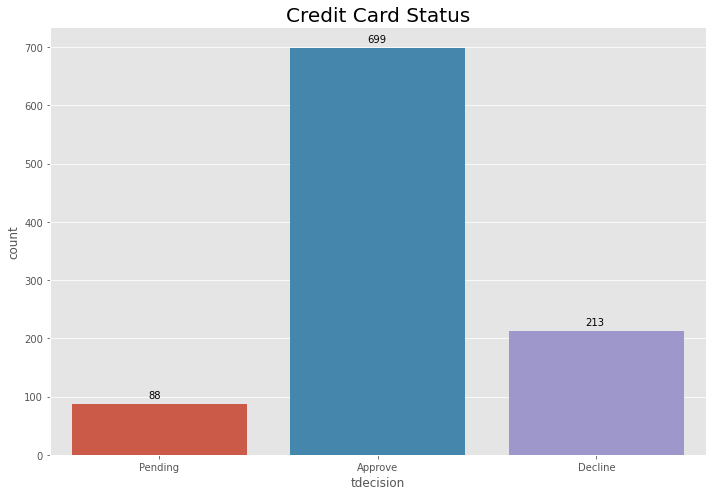

In [772]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data['tdecision'])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))
plt.title("Credit Card Status", fontsize=20)
plt.tight_layout()
plt.show()


In [0]:
pending_cases = data[data["tdecision"].isin(["Pending"])]

In [774]:
pending_cases['Source'].value_counts()

EC    88
Name: Source, dtype: int64

In [0]:
#pending_cases.shape

In [0]:
#data.shape

In [0]:
data.drop(data[data["tdecision"]=="Pending"].index,axis=0,inplace=True)

In [0]:
#data.shape
#checking shape

# EDA

### Categorical Data

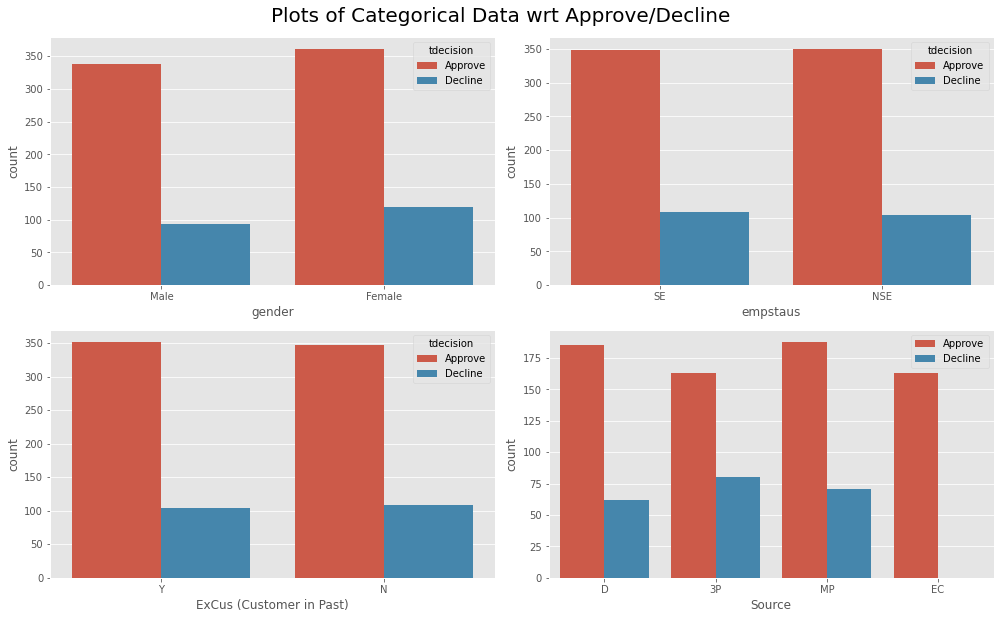

In [779]:
f,ax = plt.subplots(2,2,figsize=(14,9))
plt.suptitle("Plots of Categorical Data wrt Approve/Decline", fontsize=20)
sns.countplot(x="gender",hue="tdecision", data=data,ax=ax[0,0])
sns.countplot(x="empstaus",hue="tdecision", data=data,ax=ax[0,1])
sns.countplot(x="ExCus (Customer in Past)",hue="tdecision", data=data,ax=ax[1,0])
sns.countplot(x="Source",hue="tdecision", data=data,ax=ax[1,1])
plt.legend(loc='upper right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [780]:
filter1 = data["Source"].isin(["EC"])
filter2 = data["tdecision"].isin(["Decline"])
fil = data[filter1 & filter2]
fil

,gender,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking,Booking_Amt


### Numerical Data

In [0]:
corr = data.corr()

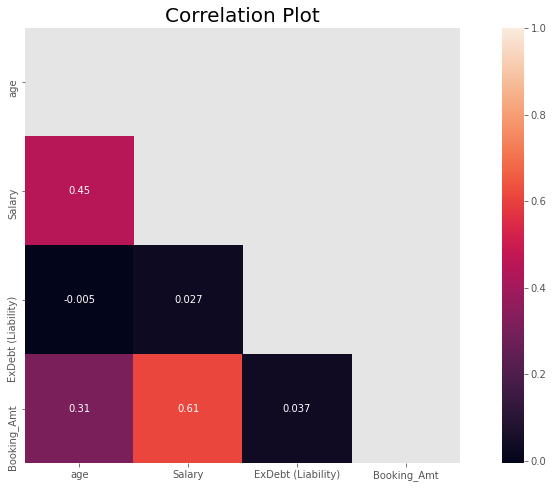

In [782]:
plt.figure(figsize=(15,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,mask=mask,square=True,vmax=1)
plt.title("Correlation Plot", fontsize=20)
plt.show()

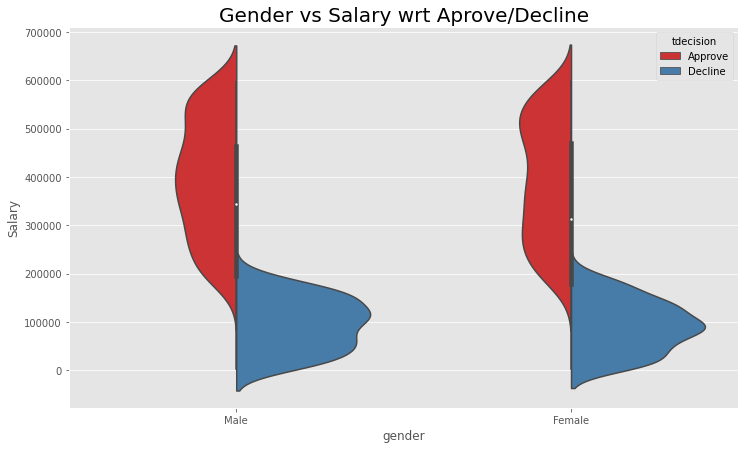

In [783]:
plt.figure(figsize=(12,7))
sns.violinplot(x=data["gender"],y=data["Salary"],hue=data["tdecision"], split=True, palette = "Set1")
plt.title("Gender vs Salary wrt Aprove/Decline",fontsize=20)
plt.show()

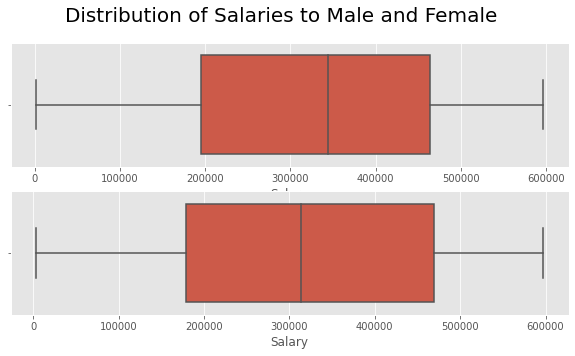

In [784]:
male = data[data['gender']=="Male"]
female = data[data['gender']=="Female"]
f2,ax2 = plt.subplots(2,1,figsize=(10,5))
sns.boxplot(male['Salary'],ax=ax2[0])
sns.boxplot(female['Salary'],ax=ax2[1])
plt.suptitle("Distribution of Salaries to Male and Female", fontsize=20)
plt.show()

#This shows that there are more number of women than men with higher Salary

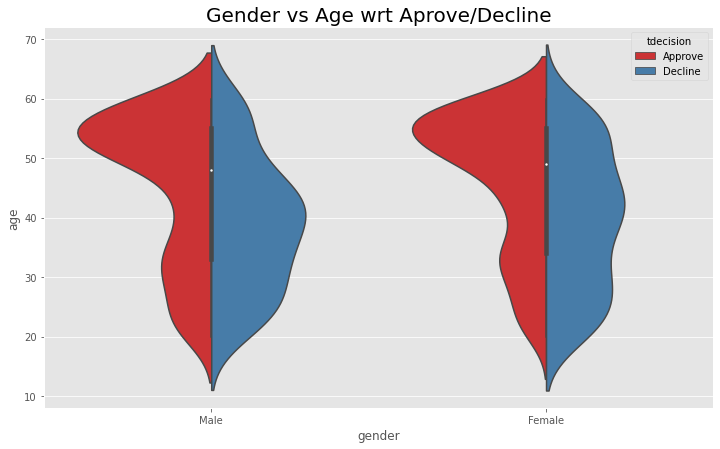

In [785]:
plt.figure(figsize=(12,7))
sns.violinplot(x=data["gender"],y=data["age"],hue=data["tdecision"], split=True, palette='Set1')
plt.title("Gender vs Age wrt Aprove/Decline",fontsize=20)
plt.show()

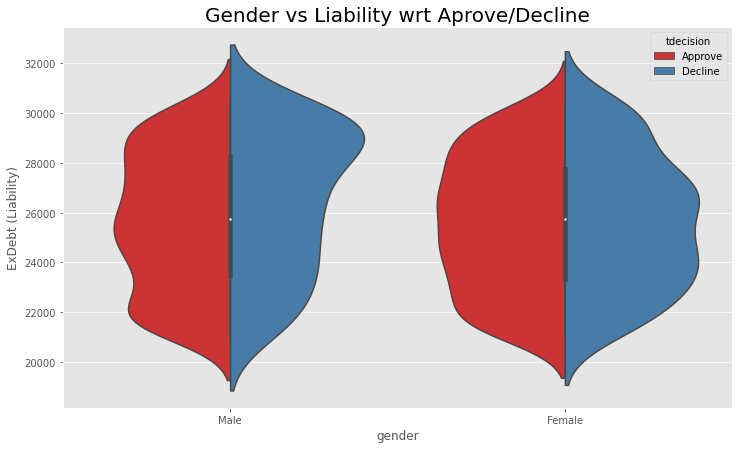

In [786]:
plt.figure(figsize=(12,7))
sns.violinplot(x=data["gender"],y=data["ExDebt (Liability)"],hue=data["tdecision"], split=True, palette='Set1')
plt.title("Gender vs Liability wrt Aprove/Decline",fontsize=20)
plt.show()

In [0]:
les = LassoCV()

## FEATURE AND TARGETS

In [0]:
target = data['tdecision']
features_ = data.drop(["tdecision","Booking","Booking_Amt"],axis=1)

In [0]:
features_enc1 = pd.get_dummies(features_['gender'],drop_first=True,prefix='gender')
features_enc2 = pd.get_dummies(features_['empstaus'],drop_first=True,prefix='empstaus')
features_enc3 = pd.get_dummies(features_['ExCus (Customer in Past)'],drop_first=True, prefix='ExCus')
features_enc4 = pd.get_dummies(features_['Source'],drop_first=True,prefix='Source')

features = pd.concat([features_,features_enc1,features_enc2,features_enc3,features_enc4],axis=1)
features = features.drop(['gender','empstaus','ExCus (Customer in Past)','Source'],axis=1)

In [0]:
#features

# MODELLING


In [0]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=300,random_state=3)

In [0]:
scores = cross_val_score(rfc,features,target,cv=5)

In [795]:
print("Cross Validation Scores: {}".format(list(map(lambda x: round(x*100,2),scores))))

Cross Validation Scores: [98.91, 98.91, 98.9, 99.45, 98.35]


In [796]:
print("Standard Deviation among Cross Validation Scores: {:.4f}".format(scores.std()))

Standard Deviation among Cross Validation Scores: 0.0035


In [797]:
print("Maximum Accuracy obtained: {:.2f}%".format(max(scores)*100))

Maximum Accuracy obtained: 99.45%


# PREDICTION ON THE PENDING STATUS (RANDOM FOREST CLASSIFIER MODEL)

In [0]:
pending_features_ = pending_cases.drop(["tdecision","Booking","Booking_Amt"],axis=1)

In [0]:
pfeatures_enc1 = pd.get_dummies(pending_features_['gender'],drop_first=True,prefix='gender')
pfeatures_enc2 = pd.get_dummies(pending_features_['empstaus'],drop_first=True,prefix='empstaus')
pfeatures_enc3 = pd.get_dummies(pending_features_['ExCus (Customer in Past)'],drop_first=True, prefix='ExCus')
pfeatures_enc4 = pd.get_dummies(pending_features_['Source'],prefix='Source')

pending_features = pd.concat([pending_features_,pfeatures_enc1,pfeatures_enc2,pfeatures_enc3,pfeatures_enc4],axis=1)
pending_features = pending_features.drop(['gender','empstaus','ExCus (Customer in Past)','Source'],axis=1)

In [0]:
rfc1= RandomForestClassifier(n_estimators=300,random_state=3)

In [801]:
pending_features.columns

Index(['age', 'Salary', 'ExDebt (Liability)', 'gender_Male', 'empstaus_SE',
       'ExCus_Y', 'Source_EC'],
      dtype='object')

In [0]:
features1 = features[['age', 'Salary', 'ExDebt (Liability)', 'gender_Male', 'empstaus_SE','ExCus_Y','Source_EC']]

In [803]:
rfc1.fit(features1,target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rfc1.predict(pending_features)

In [0]:
prediction = pending_features.copy()

In [0]:
prediction['Prediction_tdecision'] = y_pred

In [807]:
prediction.Prediction_tdecision.value_counts()

Approve    78
Decline    10
Name: Prediction_tdecision, dtype: int64

In [808]:
prediction

,age,Salary,ExDebt (Liability),gender_Male,empstaus_SE,ExCus_Y,Source_EC,Prediction_tdecision
0,34,127110,25130,0,1,1,1,Approve
15,54,52946,27393,1,0,0,1,Decline
16,40,161836,24483,1,0,0,1,Approve
21,54,47101,26752,1,1,1,1,Approve
30,35,65244,27013,0,0,1,1,Approve
...,...,...,...,...,...,...,...,...
937,27,33165,21423,0,0,0,1,Approve
952,42,116618,26211,0,1,1,1,Approve
995,28,120892,26779,0,0,1,1,Approve
997,42,33380,29547,1,1,0,1,Approve


In [0]:
prediction_index = prediction.index.tolist()

In [0]:
predicted_dataset = orig_data.copy()

In [0]:
for i in prediction_index:
  predicted_dataset.loc[i,'tdecision'] = prediction.loc[i,'Prediction_tdecision']

In [0]:
predicted_dataset.to_excel("Predicted_tdecision_Dataset.xlsx")

# Importance of Columns





In [813]:
rfc2 = RandomForestClassifier(n_estimators=300,random_state=3)
rfc2.fit(features, target)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [814]:
importances = pd.DataFrame({'feature':features.columns,'importance':np.round(rfc2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Salary,0.852
age,0.054
ExDebt (Liability),0.047
Source_EC,0.030
ExCus_Y,0.004
Source_MP,0.004
gender_Male,0.003
empstaus_SE,0.003
Source_D,0.003


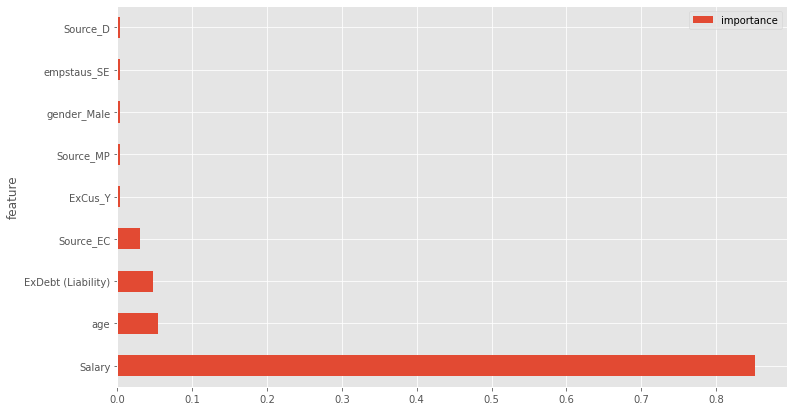

In [815]:
f = plt.figure(figsize=(12,7))
ax = f.add_subplot()
importances.plot(kind='barh',ax = ax)
plt.show()

# Operation on Important columns


In [0]:
new_features_ = features[['Salary','age','ExDebt (Liability)','Source_EC']]

In [0]:
convert = {"Approve": 1, "Decline":0}
new_target = target.map(convert)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(new_features_,np.array(new_target),test_size=0.3,random_state=3)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf = DecisionTreeClassifier()

In [821]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred_ = clf.predict(x_test)

In [823]:
print(classification_report(y_pred_,y_test,target_names=["Approve","Decline"]))

              precision    recall  f1-score   support

     Approve       0.98      1.00      0.99        57
     Decline       1.00      1.00      1.00       217

    accuracy                           1.00       274
   macro avg       0.99      1.00      0.99       274
weighted avg       1.00      1.00      1.00       274



In [0]:
clf_rep = classification_report(y_pred_,y_test,output_dict=True)

In [0]:
report = pd.DataFrame(clf_rep).transpose()

In [0]:
report = report.rename({"1":"Approve", "0":"Decline"})

In [827]:
report

,precision,recall,f1-score,support
Decline,0.982759,1.000000,0.991304,57.00000
Approve,1.000000,0.995392,0.997691,217.00000
accuracy,0.996350,0.996350,0.996350,0.99635
macro avg,0.991379,0.997696,0.994497,274.00000
weighted avg,0.996413,0.996350,0.996362,274.00000


# PREDICTION ON PENDING CLASS (DECISION TREE CLASSIFIER MODEL)

In [0]:
pending_pred = clf.predict(pending_features[['Salary','age','ExDebt (Liability)','Source_EC']])

In [0]:
def conv_(x):
  if(x==1):
    return "Approve"
  return "Decline"

In [0]:
outcome = list(map(conv_,pending_pred))

In [0]:
dtc_predictions = pending_cases.copy()

In [0]:
dtc_predictions['tdecision'] = outcome

In [0]:
dtc_predictions.to_excel("Predictions_using_Decision_Tree_Classifier.xlsx")

In [834]:
dtc_predictions.tdecision.value_counts()

Decline    87
Approve     1
Name: tdecision, dtype: int64

# METRICS CALCULATION

In [835]:
orig_data.head()

,Application id,first_name,last_name,email,gender,address,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking,INT_ID,Prev_ID,AGT_ID,Booking_Amt
0,1,Dollie,Scafe,dscafe0@is.gd,Female,02 Garrison Pass,34,Pending,SE,Y,EC,127110,25130,NaN,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,NaN
1,2,Austin,Pennycook,apennycook1@mac.com,Male,007 Miller Road,57,Approve,SE,Y,D,464039,22311,Y,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,278423.4
2,3,Mareah,Tomanek,mtomanek2@bloomberg.com,Female,145 Charing Cross Junction,57,Approve,SE,Y,3P,584420,28557,Y,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,350652.0
3,4,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,Female,268 Algoma Hill,59,Approve,SE,Y,3P,583781,26042,Y,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,350268.6
4,5,Danyette,Stempe,dstempe4@tumblr.com,Female,571 Stone Corner Park,51,Approve,SE,N,MP,551718,27892,Y,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,331030.8


In [0]:
total_applications = len(orig_data["Application id"])

In [0]:
approved_applications = len(orig_data[orig_data["tdecision"]=="Approve"])

In [0]:
booked_applications = len(orig_data[orig_data["Booking"]=="Y"])

In [0]:
approval_rate = approved_applications/total_applications

In [0]:
booking_rate = booked_applications/approved_applications

In [0]:
new_booking_amount = []
current = 0
for i in range(orig_data.shape[0]):
  if(orig_data.loc[i,"tdecision"] == "Approve" and orig_data.loc[i,"Booking"] == "Y"):
    current += orig_data.loc[i,"Booking_Amt"]
  new_booking_amount.append(current)

In [0]:
new_booking_amount = np.array(new_booking_amount)

In [0]:
new_booking_amount_df = orig_data.copy()

In [0]:
new_booking_amount_df["New_Booking_Amt"] = new_booking_amount

In [0]:
new_booking_amount_df.to_excel("Data_with_New_Booking_Amount.xlsx")

In [846]:
print("Total Applications: {}".format(total_applications))
print("Approved Applications: {}".format(approved_applications))
print("Booked Applications: {}".format(booked_applications))
print("Approval Rate: {}".format(apprioval_rate))
print("Booking Rate: {:.3f}".format(booking_rate))

Total Applications: 1000
Approved Applications: 699
Booked Applications: 581
Approval Rate: 0.699
Booking Rate: 0.831
